In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
#Read in data 
df= pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df= df.head(50000)

In [5]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

We're going to be running the Setiment Analysis on this column, named 'Text' which is the review by the customer.

In [6]:
print(df.shape)

(50000, 10)


We find out that the dataset has more than half a million rows of reviews. We're gonna try and run the Sentiment Analysis on all of it.

Performing EDA to explore the dataset we have on our hands.

In [7]:
df['Score'].value_counts().sort_index()

Score
1     4721
2     2814
3     4047
4     7288
5    31130
Name: count, dtype: int64

Plotting the findings

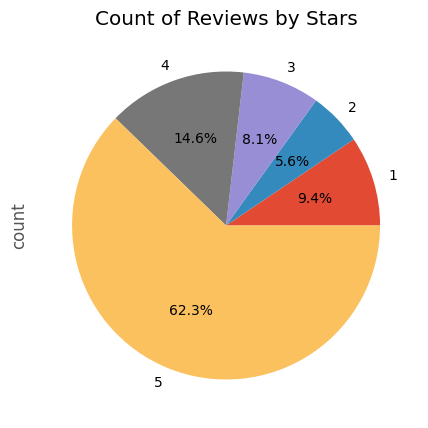

In [8]:
piech=df['Score'].value_counts().sort_index().plot(kind='pie', title ='Count of Reviews by Stars', figsize= (10,5), autopct='%1.1f%%' )
piech.set_label('Review Stars')
plt.show()

We find that there is a positive bias in the rating of the products in the sample.

Performing basic NLTK

In [9]:
example= df['Text'][99]
print(example)

I fed this to my Golden Retriever and he hated it.  He wouldn't eat it, and when he did, it gave him terrible diarrhea.  We will not be buying this again.  It's also super expensive.


ooh thats a bad review, lets check out what the star rating is for this review. I bet its 1

In [10]:
example_star_value =df['Score'][99]
print(example_star_value)

1


Yup, just as expected, Alright

In [11]:
tokens=nltk.word_tokenize(example)
tokens

['I',
 'fed',
 'this',
 'to',
 'my',
 'Golden',
 'Retriever',
 'and',
 'he',
 'hated',
 'it',
 '.',
 'He',
 'would',
 "n't",
 'eat',
 'it',
 ',',
 'and',
 'when',
 'he',
 'did',
 ',',
 'it',
 'gave',
 'him',
 'terrible',
 'diarrhea',
 '.',
 'We',
 'will',
 'not',
 'be',
 'buying',
 'this',
 'again',
 '.',
 'It',
 "'s",
 'also',
 'super',
 'expensive',
 '.']

It divides the input text into a list of words and punctuation marks. 
This helps in breaking down the text into manageable pieces for further processing.
It also removes whitespaces that are not necessary for analysis.

Note: Since ' is a punctuation, it'll break the words for example It's into 'It' and "'s"

In [12]:
tagged= nltk.pos_tag(tokens)
tagged

[('I', 'PRP'),
 ('fed', 'VBP'),
 ('this', 'DT'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('Golden', 'NNP'),
 ('Retriever', 'NNPS'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('hated', 'VBD'),
 ('it', 'PRP'),
 ('.', '.'),
 ('He', 'PRP'),
 ('would', 'MD'),
 ("n't", 'RB'),
 ('eat', 'VB'),
 ('it', 'PRP'),
 (',', ','),
 ('and', 'CC'),
 ('when', 'WRB'),
 ('he', 'PRP'),
 ('did', 'VBD'),
 (',', ','),
 ('it', 'PRP'),
 ('gave', 'VBD'),
 ('him', 'PRP'),
 ('terrible', 'JJ'),
 ('diarrhea', 'NN'),
 ('.', '.'),
 ('We', 'PRP'),
 ('will', 'MD'),
 ('not', 'RB'),
 ('be', 'VB'),
 ('buying', 'VBG'),
 ('this', 'DT'),
 ('again', 'RB'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('also', 'RB'),
 ('super', 'JJ'),
 ('expensive', 'NN'),
 ('.', '.')]

We tagged each word into part of speech. 
For example: NN stands for Noun, JJ is Adjective, DT is Determiner

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  fed/VBP
  this/DT
  to/TO
  my/PRP$
  (ORGANIZATION Golden/NNP Retriever/NNPS)
  and/CC
  he/PRP
  hated/VBD
  it/PRP
  ./.
  He/PRP
  would/MD
  n't/RB
  eat/VB
  it/PRP
  ,/,
  and/CC
  when/WRB
  he/PRP
  did/VBD
  ,/,
  it/PRP
  gave/VBD
  him/PRP
  terrible/JJ
  diarrhea/NN
  ./.
  We/PRP
  will/MD
  not/RB
  be/VB
  buying/VBG
  this/DT
  again/RB
  ./.
  It/PRP
  's/VBZ
  also/RB
  super/JJ
  expensive/NN
  ./.)


method to print the named entities tree is pprint(), not print()

**VADER SENTIMENT SCORING**

(Valence Aware Dictionary an Sentiment Reasoner) - Bags of word approach

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool 
specifically attuned to sentiments expressed in social media. 

It is particularly effective for short texts, such as tweets or product reviews. 

VADER combines a sentiment lexicon (a list of lexical features with known sentiment values) with a set 
of heuristics to determine the sentiment score of a text.

Key Features of VADER
Sentiment Lexicon:

Contains words and phrases with pre-assigned sentiment scores.
Scores range from -4 (extremely negative) to +4 (extremely positive).
Heuristics:

Punctuation (e.g., "!!!" increases the intensity of the sentiment).
Capitalization (e.g., "GOOD" is more intense than "good").
Degree modifiers (e.g., "very good" is more positive than "good").
Conjunctions (e.g., "but" changes the sentiment of the preceding clause).
Negations (e.g., "not good" changes the sentiment).
Sentiment Scores
VADER outputs four sentiment scores for a given text:

Positive: Proportion of text that is positive.
Neutral: Proportion of text that is neutral.
Negative: Proportion of text that is negative.
Compound: Overall sentiment score that combines the positive, neutral, 
and negative scores into a single value normalized between -1 (most extreme negative) 
and +1 (most extreme positive)

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia= SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
sia.polarity_scores(example)

{'neg': 0.173, 'neu': 0.735, 'pos': 0.092, 'compound': -0.5267}

Having read the review and the Star rating of one, we can confirm that the model is predicting the polarity score correctly as negetive.

We're gonna run the polarity score tester on the entire dataset now 

In [16]:
res= {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid]= sia.polarity_scores(text)


  0%|          | 0/50000 [00:00<?, ?it/s]

In [17]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'compound': -0.1027},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},

Since the output is a dictionary, we'l; put it in a dataframe 

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns= {'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [19]:
vaders.head(50)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,0.000,0.520,0.480,0.9487,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


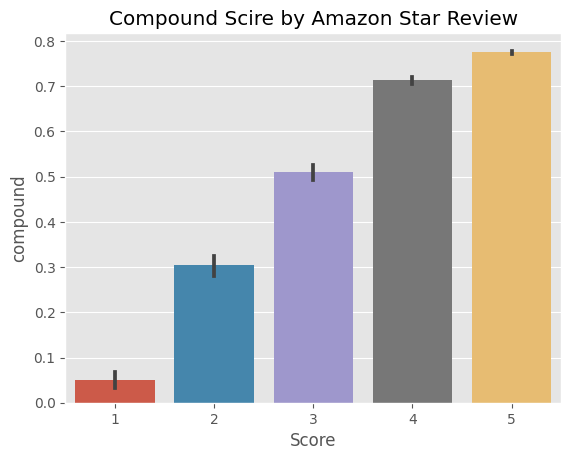

In [20]:
ax = sns.barplot(data = vaders, x= 'Score',y = 'compound')
ax.set_title('Compound Scire by Amazon Star Review')
plt.show()

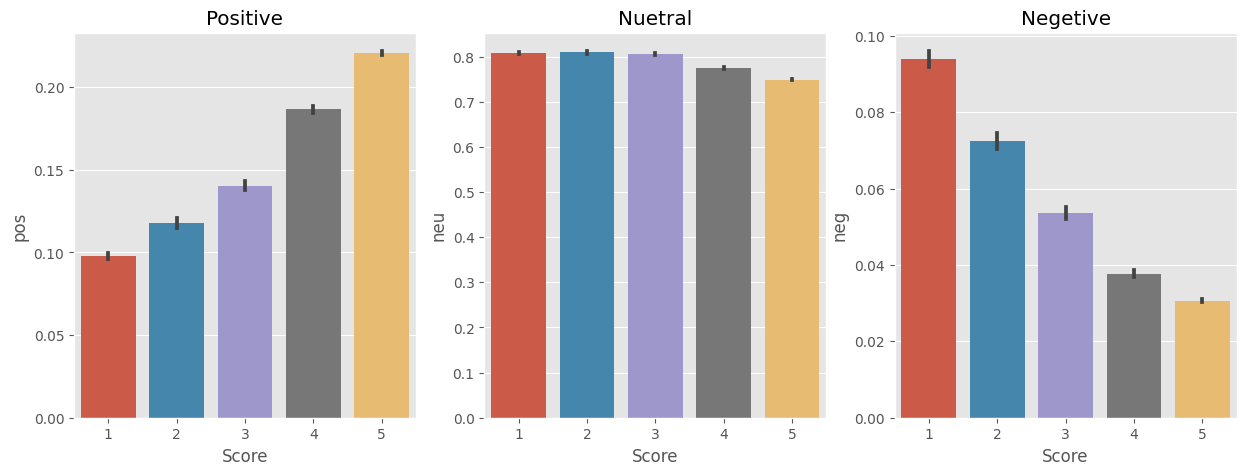

In [21]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos',ax =axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax= axs[1])
sns.barplot(data = vaders, x='Score', y ='neg', ax= axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Nuetral')
axs[2].set_title('Negetive')
plt.show()

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
